In [10]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression

## Logistic Regression Class

In [52]:
class LogisticRegression:
    def __init__(self, eta=0.01, n_epochs = 100, random_state = 1):
        self.eta = eta
        self.n_epochs = n_epochs
        self.random_state = random_state

    def net_input(self, x):
        """Compute linear combination of x and weights"""
        return np.dot(self.w_.T, x) + self.b_
        
    def sigmoid(self, z):
        """Compute logistic sigmoid activation"""
        return 1.0/(1.0 + math.e ** (-z))

    def predict(self, x):
        """Predict class label of x"""
        z = self.net_input(x)
        return np.where(self.sigmoid(z) >= 0.5, 1, 0) 

    def loss_function(self, a, y):
        """Compute the loss function"""
        return -(y * (np.log(a)) + (1 - y) * (np.log(1 - a)))

    def fit(self, X, Y):
        """
        Training the logistic regression model with the given dataset using gradient descent.
        
        Parameters:
        X : {array-like}, shape = [n_objects, m_features]
            The m by n input feature matrix, where each row is a training example (object), and each column is a feature.
            The total number of rows (m_examples) represents the total number of objects .
            The total number of columns (n_features) represents the total number of predictor variables.
        Y : {array-like}, shape = [n_objects, 1]
            Target values or class labels.
            i'th value of Y corresponds to i'th row in X 
        """
        # 1) intialize the weights and bias
        rgen = np.random.RandomState(self.random_state) # create an instance of random number generator
        self.m_features_ = X.shape[1] # get the number of predictor variables (features)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=self.m_features_) ## an instance attribute for the weights of the Perceptron
        self.b_ = np.float64(0.) ## an instance attribute for the bias value

        print(self.w_)
        print(self.w_.T)
        
        # 2) gradient descent # Will have you visualize the cost function over time 
        self.costs_ = [] ## logging cost function value in each epoch
        
        for _ in range(self.n_epochs): # repeats it for epoch times 
            L = 0.0 ## for cost function value
            dw = np.zeros(self.m_features_)
            db = 0.0 
            for x, y in zip(X, Y):
                ## TODO : compute net input
                z = self.net_input(x) 
                
                ## TODO : compute the output of the sigmoid function
                a = self.sigmoid(z) 

                ## TO for each sample, accumulate the cost function by adding the loss value of a and y to it
                L += self.loss_function(a,y) 

                ## TODO compute the difference between a and y
                dz = a - y 
                
                ## TODO: accumulate dw and db
                dw += x * dz
                db += dz
            
            self.costs_.append(L/X.shape[0])
            
            ## TODO: compute the average of dw and db
            dw = dw / X.shape[0]
            db = db / X.shape[0]
            
            ## TODO: update weights
            self.w_ = self.w_ - self.eta * dw 
            
            ## TODO: update bias
            self.b_ = self.b_ - self.eta * db 
        return self

## Training a linear regression model on the Iris dataset

In [12]:
### Get original iris dataset
iris = sns.load_dataset('iris')
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### Processing the iris data set for binary classification
Originally, the iris dataset has 3 unique labels: Setosa, VersiColor, and Virginica. 
However, to show the binary classification, we only use two labels: Setosa and VersiColor. We will also use two features: petal_length and sepal_length

In [13]:
df = iris.iloc[0:100, [0, 2, 4]]
df.tail()

,sepal_length,petal_length,species
95,5.7,4.2,versicolor
96,5.7,4.2,versicolor
97,6.2,4.3,versicolor
98,5.1,3.0,versicolor
99,5.7,4.1,versicolor


In [14]:
# create a mapping dict
# to convert class labels from strings to integers
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['species']))}
print(f'class_mapping = {class_mapping}')

# convert class labels from strings to integers
df['species'] = df['species'].map(class_mapping)
df

class_mapping = {'setosa': 0, 'versicolor': 1}


,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1


### Splitting Dataset: Training and Testing Set

In [15]:
from sklearn.model_selection import train_test_split

# Split df into features (X) and labels (y)
X = df[['sepal_length', 'petal_length']].values  # Features (first two columns)
Y = df['species'].values  # Target label (last column)

# Split the dataset into training and testing sets
# test_size=0.2 means 80% training, 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shape of the splits
print(f"Training data shape (X_train): {X_train.shape}, (Y_train): {Y_train.shape}")
print(f"Testing data shape (X_test): {X_test.shape}, (Y_test): {Y_test.shape}")
print(f'type(X_train): {type(X_train)}')
print(f'type(Y_train): {type(Y_train)}')
print(f'type(X_test): {type(X_test)}')
print(f'type(Y_test): {type(Y_test)}')

Training data shape (X_train): (80, 2), (Y_train): (80,)
Testing data shape (X_test): (20, 2), (Y_test): (20,)
type(X_train): <class 'numpy.ndarray'>
type(Y_train): <class 'numpy.ndarray'>
type(X_test): <class 'numpy.ndarray'>
type(Y_test): <class 'numpy.ndarray'>


In [ ]:
### Train the Logistic Regresion model

In [58]:
## TODO: create an instance of logistic regression model
lrm = LogisticRegression( eta = .01, n_epochs = 10000, random_state = 1 )

## TODO: fit lrm using training data
lrm.fit(X,Y)

[ 0.01624345 -0.00611756]
[ 0.01624345 -0.00611756]


Text(0.5, 1.0, 'Cost function value in each iteration')

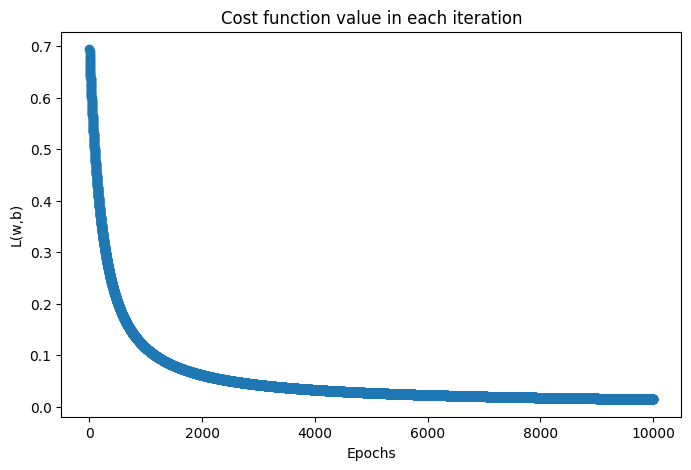

In [59]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(lrm.costs_) + 1), lrm.costs_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('L(w,b)')
plt.title('Cost function value in each iteration')

### Predict the class label of data points in testing set

In [60]:
from sklearn.metrics import accuracy_score

Y_test_hats = []
for xi in X_test:
    ## TODO : predict xi's class label, 
    ## Hint : call the lrm.predict method
    y_hat = lrm.predict(xi)
    Y_test_hats.append(y_hat)

# Calculate accuracy
accuracy = accuracy_score(np.array(Y_test_hats), Y_test)
print(f"Accuracy of the testing set: {accuracy * 100:.2f}%")  # Display accuracy

Accuracy of the testing set: 100.00%
